# 多項式カーブフィッティング

PRMLの1章の簡単版をtensorflowで解いてみよう、というkoanです。
トレーニングデータとしてはsinの周辺に少しノイズで広がっているようなデータで、ここでは4次方程式でフィッティングし てみます。（PRML p7, Figure 1.4相当)

未実装のセルを適宜実装して、assertEquals()のセルがエラーにならないようにしてください。

In [103]:
from utils import assertEquals, assertTrue
import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
rs = np.random.RandomState(123)

In [3]:
x_arr = np.linspace(0, 1, 10)

In [4]:
real_y = np.sin(x_arr*2*math.pi)

In [5]:
noise = rs.normal(0, 0.3, (len(x_arr)))

In [6]:
# Some assert depend on random seeds. Confirm whether properly fixed.
assertEquals(0.4954, noise[5])


### タスク1: real_yにノイズが加わった、noisy_yを求めよ。

In [102]:
# TODO: Implement here!

noisy_y = np.zeros_like(real_y)

In [8]:
assertTrue(noisy_y[0] != real_y[0], "Noise should be added to first element.")
assertTrue(len(noisy_y)==len(real_y), "Num of data must be match.")

# this assert is depend on random seed.
assertEquals(0.1534, noisy_y[5])

In [16]:
plt.scatter(x_arr, real_y, marker='^')
plt.scatter(x_arr, noisy_y, marker='o')
plt.show()

# Tensorflowのモデル

$$ y = a + b*x + c*x^2 + d*x^3 + e*x^4 $$ の形でフィッティング。

a, b, c, d, eを学習する。

In [9]:
import tensorflow as tf

### placeholderの定義。xと、それに対応する教師用のラベルのyを入れるplaceholderを定義。

In [10]:
x = tf.placeholder(tf.float32)
y_label = tf.placeholder(tf.float32)

### 4次多項式の係数を定義

この係数を、lossが小さくなるようにoptimizeしていく。

In [11]:
a = tf.Variable([0.5], dtype=tf.float32)
b = tf.Variable([0.5], dtype=tf.float32)
c = tf.Variable([0.5], dtype=tf.float32)
d = tf.Variable([0.5], dtype=tf.float32)
e = tf.Variable([0.5], dtype=tf.float32)

### 今回はSessionをグローバル変数に作り、global_variables_initializerも最初に呼んでしまう

In [12]:
sess = tf.Session()

In [13]:
sess.run(tf.global_variables_initializer())

### yをデータから予測する式のグラフ

In [14]:
y_predict = a+b*x+c*x**2 + d*x**3 + e*x**4

### タスク2: lossを定義せよ。lossはラベルとpredictionの値の差の二乗の和とする。

In [38]:
# Implement Here!
loss = tf.constant(0.2)

### タスク3: sess.run()を用いて、xにx_arr[3]とx_arr[4]を入れて、y_labelにreal_y[3]とreal_y[4]を入れた時のロスを求めよ。

- 注意: noisy_yでは無くreal_yです。
- sess.run()の使い方の練習です。
- デバッグなどで、手計算した値と合うか、というのを確認する為にこういう事は良く行います。

In [32]:
# Implement Here!

actual = [x_arr[3:5]+real_y[3:5]]

In [33]:
assertEquals(0.3083, actual[0])
assertEquals(1, len(actual))

### タスク4: lossを最小化する為のオペレーションのグラフを構築せよ。

ヒント: tf.train.GradientDescentOptimizerを使う。learning rateは0.01で。


In [101]:
# TODO: implement here!

train_op = tf.constant(0.0)

### タスク5: train_opをx_arr[3]とnoisy_y[3]に対して、2回実行せよ

In [64]:
# Implement Here.
sess.run([x])
sess.run([x])

In [66]:
[res_a], [res_b], [res_c], [res_d] = sess.run([a, b, c, d])

In [67]:
target = x_arr[3]
original_loss = 0.5 + 0.5*target + 0.5*target**2 + 0.5*target**3
cur_loss = res_a+res_b*target+res_c*target**2+res_d*target**3

In [69]:
assertTrue(cur_loss < original_loss)

In [71]:
# 元のロスよりは小さくなっているはず
original_loss, cur_loss

(0.7407407407407407, 0.71878326270315374)

In [94]:
# real_yでのトレーニング結果をリセット

sess.run(tf.global_variables_initializer())

### トレーニング

In [95]:
all_losses = []
for epoch in range(1000):
    res_loss, res_train, [res_a], [res_b], [res_c], [res_d] = sess.run([loss, train_op, a, b, c, d], {x: x_arr, y_label: noisy_y})
    all_losses.append(res_loss)

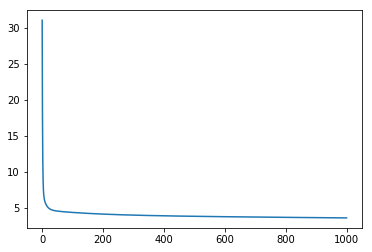

In [96]:
plt.plot(all_losses)
plt.show()

### タスク6: res_a, res_b, res_c, res_dとx_arrを使って、（numpyで）predictionの結果の配列、pred_arrを作れ

In [104]:
# TODO: Implement Here!
pred_arr = np.zeros_like(x_arr)

In [98]:
assertEquals(0.682, pred_arr[0])
assertEquals(0.498, pred_arr[3])

In [99]:
plt.scatter(x_arr, real_y, marker='^')
plt.scatter(x_arr, noisy_y, marker='o')
plt.scatter(x_arr, pred_arr, marker='<')
plt.show()